<a href="https://colab.research.google.com/github/irissun9602/DeepLearningProject/blob/master/stock_price_with_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finance-datareader
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 1.7 MB/s 


In [ ]:
import FinanceDataReader as fdr
df_krx =fdr.StockListing("KRX")

In [ ]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [ ]:
df = fdr.DataReader(symbol='005930', start='2020')

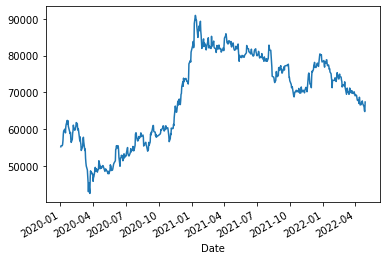

In [ ]:
df['Close'].plot()

In [ ]:
import pandas as pd
start_date = '20000101'
end_date = '20220401'
sample_code = '005930' # 삼성전자
stock_price = fdr.DataReader(sample_code, start= start_date, end = end_date)

In [ ]:
import numpy as np
def Hz(df, col):
   fft = df[col] = df[col]/20000
   return fft

In [ ]:

def FFT(df, col):
  fft = np.fft.fft(df[col])
  return fft

In [ ]:
#fft_result =Hz(stock_price, 'Close')
#plt.plot(fft_result)
fft_result = FFT(stock_price, 'Close')

In [ ]:
print(fft_result)

[1.36982640e+08-1.31967681e-09j 2.49062038e+07+4.78391276e+07j
 9.06245943e+06+2.84084698e+07j ... 3.16648960e+06-2.54555160e+07j
 9.06245943e+06-2.84084698e+07j 2.49062038e+07-4.78391276e+07j]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


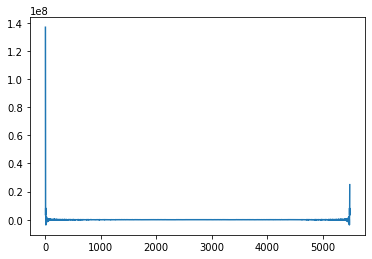

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fft_result)
plt.show()

In [ ]:
n = len(fft_result)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq =k/T
freq = freq[range(int(n/2))]


In [ ]:
Y = np.fft.fft(fft_result)
Y = Y[range(int(n/2))]
print(Y)

[3.3556120e+07-8.19563866e-08j 3.7949720e+08-8.45466275e-08j
 3.8224320e+08-4.02797014e-08j ... 1.0522672e+08+9.02218744e-08j
 1.0467752e+08-3.14612407e-08j 1.0050360e+08-1.09321263e-07j]


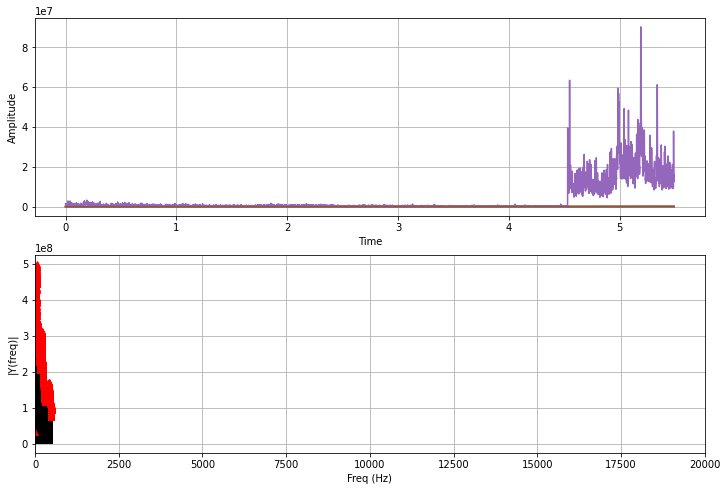

In [ ]:
time = np.arange(0, 5.492, 0.001) # fft_result 행이 5492개
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, stock_price)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^')
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20000]); ax[1].grid(True)
plt.show()

In [ ]:
fft_result.shape
time.shape
print(time)

[0.000e+00 1.000e-03 2.000e-03 ... 5.489e+00 5.490e+00 5.491e+00]


In [ ]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.ylim([0, 20]); plt.show()


ValueError: ignored

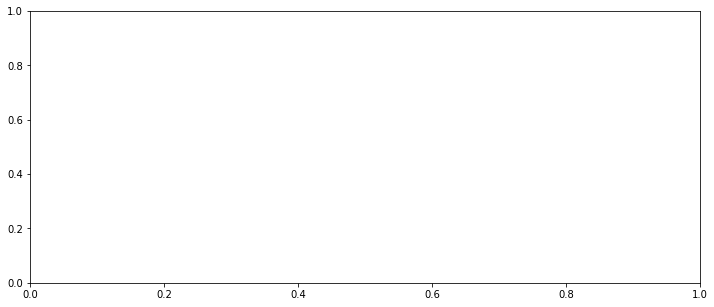

In [ ]:
draw_stft(freq, time, stock_price['Close'])